<a href="https://colab.research.google.com/github/SURESHBEEKHANI/Computer-Vision-Task-Yolo11/blob/main/YOLO11_Instance_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Mar 26 07:09:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dyY68vxYBl3amcowxpSw")
project = rf.workspace("suresh-beekhani-4xwsr").project("lung_cancer_normaug_training-sffac")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lung_Cancer_NormAug_Training-2 in yolov11:: 100%|██████████| 9084/9084 [00:02<00:00, 3596.22it/s]


In [7]:
# Load a model
model = YOLO("yolo11n-seg.pt")

# Train the model
train_results = model.train(
    data="/content/Lung_Cancer_NormAug_Training-2/data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)


Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/Lung_Cancer_NormAug_Training-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 123MB/s]


AMP: checks passed ✅


train: Scanning /content/Lung_Cancer_NormAug_Training-2/train/labels... 3870 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3870/3870 [00:02<00:00, 1750.47it/s]


train: New cache created: /content/Lung_Cancer_NormAug_Training-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Lung_Cancer_NormAug_Training-2/valid/labels... 547 images, 0 backgrounds, 0 corrupt: 100%|██████████| 547/547 [00:00<00:00, 1084.76it/s]

val: New cache created: /content/Lung_Cancer_NormAug_Training-2/valid/labels.cache


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.78G      1.772      1.389      3.573      1.254         14        640: 100%|██████████| 242/242 [01:30<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.57it/s]


                   all        547        563      0.518      0.661      0.569        0.3      0.507      0.646      0.558      0.259

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.42G      1.649       1.19      1.865      1.195         14        640: 100%|██████████| 242/242 [01:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]

                   all        547        563      0.564      0.635      0.583      0.313      0.556      0.627      0.573        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.42G      1.616      1.182      1.316      1.176         15        640: 100%|██████████| 242/242 [01:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.88it/s]

                   all        547        563      0.602      0.756      0.708      0.401      0.592      0.749      0.692      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.43G      1.596      1.214      1.109      1.163         15        640: 100%|██████████| 242/242 [01:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.92it/s]

                   all        547        563      0.587      0.769      0.666       0.38      0.581      0.762      0.645      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.45G      1.555       1.12      1.023       1.14         14        640: 100%|██████████| 242/242 [01:21<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.59it/s]

                   all        547        563      0.761      0.788      0.837      0.497      0.741      0.799      0.825      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.46G      1.505      1.122     0.9261       1.11         14        640: 100%|██████████| 242/242 [01:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.53it/s]

                   all        547        563      0.753       0.85      0.856      0.531      0.735      0.825      0.825      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.48G       1.47       1.08     0.8628      1.107         14        640: 100%|██████████| 242/242 [01:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.45it/s]

                   all        547        563      0.827      0.866      0.893      0.575       0.82      0.859      0.881      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10       3.5G      1.423      1.092     0.8041      1.082         14        640: 100%|██████████| 242/242 [01:21<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.54it/s]

                   all        547        563      0.807      0.831      0.843      0.552      0.796      0.814      0.819      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.51G      1.384      1.055     0.7516      1.059         14        640: 100%|██████████| 242/242 [01:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.44it/s]

                   all        547        563      0.896      0.901      0.916      0.633      0.885       0.89      0.906      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.53G       1.35       1.06     0.7018      1.043         14        640: 100%|██████████| 242/242 [01:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.56it/s]

                   all        547        563      0.908      0.939      0.939      0.665      0.889      0.918      0.921      0.586



10 epochs completed in 0.253 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.0MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,153 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]


                   all        547        563      0.908      0.939      0.938      0.664      0.889      0.919      0.922      0.586
        adenocarsinoma         62         70      0.937      0.929      0.962      0.706      0.895      0.886      0.915      0.655
                cancer         97         99      0.875      0.918      0.894      0.729      0.875      0.916      0.895      0.593
                nodule        388        394      0.912      0.972      0.958      0.557      0.898      0.956      0.954       0.51
Speed: 0.3ms preprocess, 3.3ms inference, 0.1ms loss, 2.5ms postprocess per image
Results saved to runs/segment/train3


# Inference

In [8]:
from IPython.display import Image

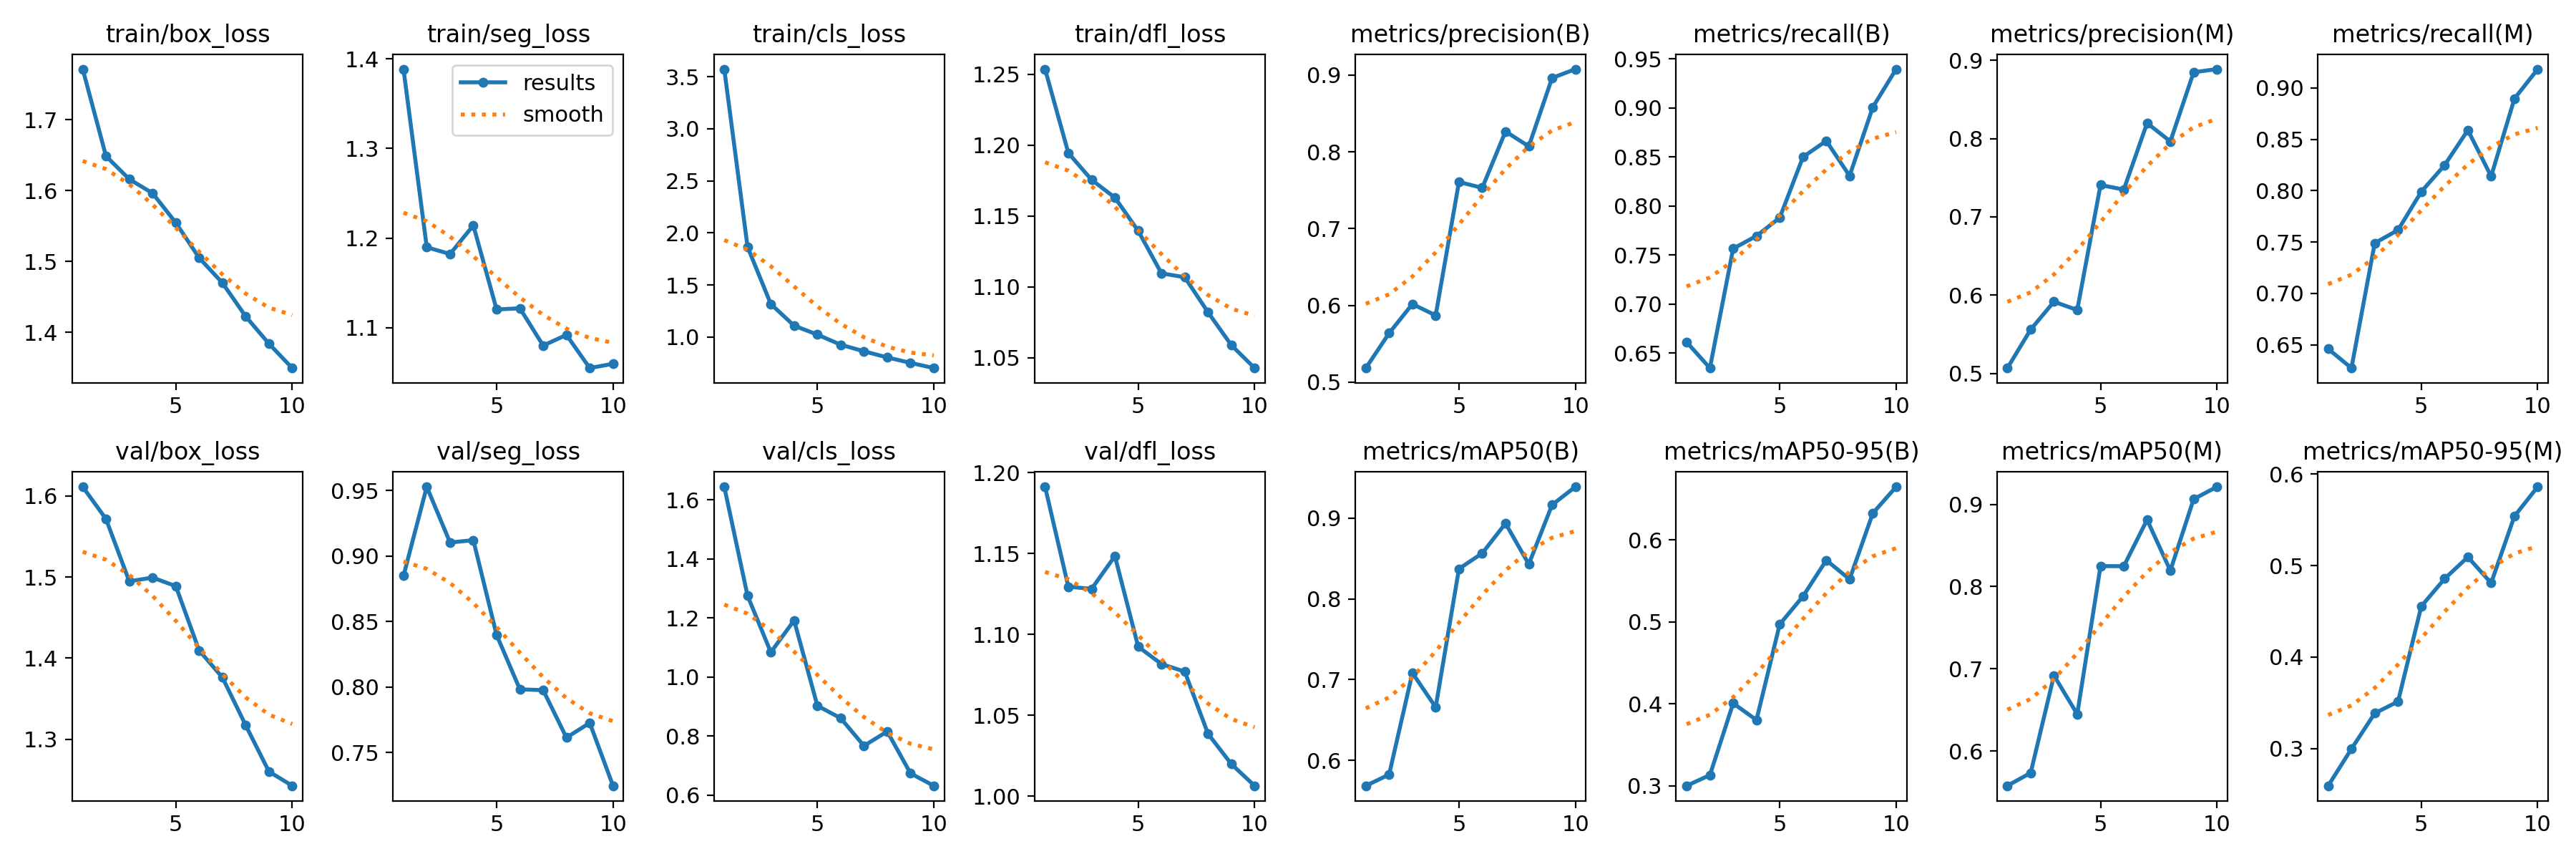

In [11]:

Image("/content/runs/segment/train3/results.png", width=600)


image 1/1 /content/Lung_Cancer_NormAug_Training-2/valid/images/seq10_train_images_101_jpg.rf.ebedff418fd67226ae73c7267612fdfe.jpg: 640x640 1 cancer, 12.1ms
Speed: 2.4ms preprocess, 12.1ms inference, 18.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


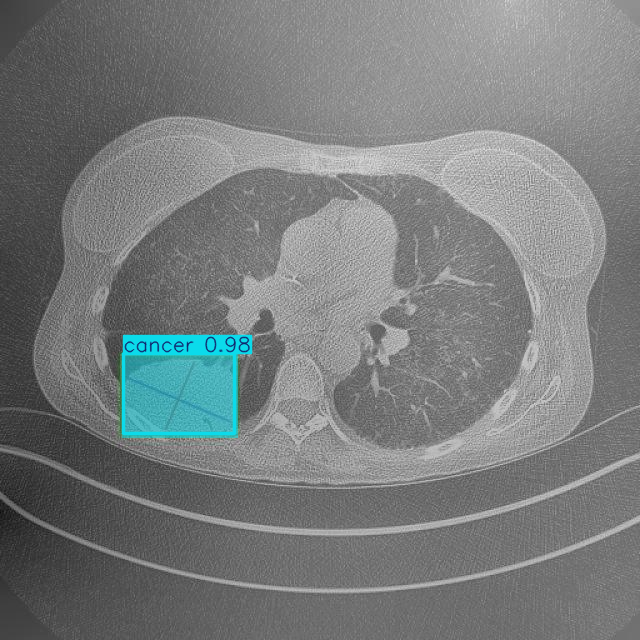

In [12]:
model = YOLO('/content/runs/segment/train3/weights/best.pt')
results = model("/content/Lung_Cancer_NormAug_Training-2/valid/images/seq10_train_images_101_jpg.rf.ebedff418fd67226ae73c7267612fdfe.jpg", save=True)
results[0].show()


image 1/1 /content/Lung_Cancer_NormAug_Training-2/valid/images/seq10_train_images_12_jpg.rf.897c3871462071ae0b3a0eee07053b3a.jpg: 640x640 2 adenocarsinomas, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


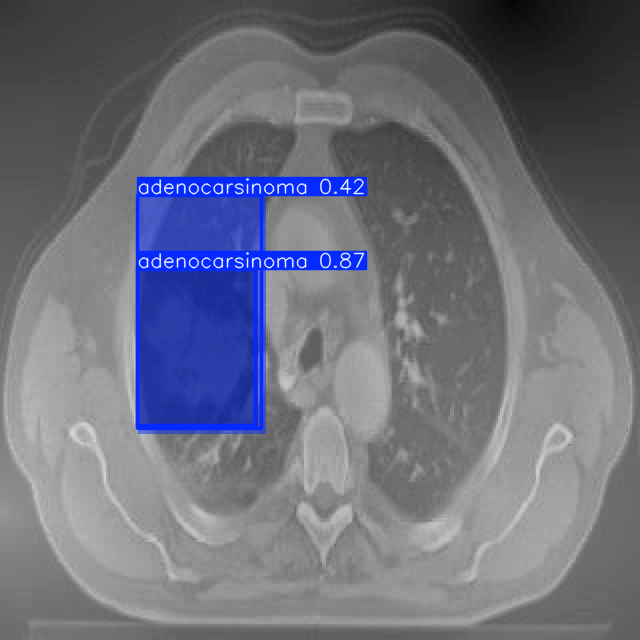

In [13]:
model = YOLO('/content/runs/segment/train3/weights/best.pt')
results = model("/content/Lung_Cancer_NormAug_Training-2/valid/images/seq10_train_images_12_jpg.rf.897c3871462071ae0b3a0eee07053b3a.jpg", save=True)
results[0].show()

In [14]:
from google.colab import files
files.download('/content/runs/segment/train3/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>